In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import pandas as pd
from identification import *

plt.style.use('default')

In [26]:

df_data_090 = pd.read_csv('../data/entrada_saida_nsenos_n10_090v.csv'  , header=None)
df_data_097 = pd.read_csv('../data/entrada_saida_nsenos_n10_097v.csv' , header=None)
df_data_104 = pd.read_csv('../data/entrada_saida_nsenos_n10_104v.csv', header=None)
df_data_111 = pd.read_csv('../data/entrada_saida_nsenos_n10_111v.csv', header=None)

In [27]:
data_090 = np.array(df_data_090, ndmin=2)
u_ar_090 = np.array(df_data_090[0],ndmin=2).T/9
y_ar_090 = np.array(df_data_090[1],ndmin=2).T

data_097 = np.array(df_data_097, ndmin=2)
u_ar_097 = np.array(df_data_097[0],ndmin=2).T/9.7
y_ar_097 = np.array(df_data_097[1],ndmin=2).T

data_104 = np.array(df_data_104, ndmin=2)
u_ar_104 = np.array(df_data_104[0],ndmin=2).T/10.4
y_ar_104 = np.array(df_data_104[1],ndmin=2).T

data_111 = np.array(df_data_111, ndmin=2)
u_ar_111 = np.array(df_data_111[0],ndmin=2).T/11.1
y_ar_111 = np.array(df_data_111[1],ndmin=2).T

### removendo o tempo morto

In [28]:
def number_of_zeros(x):
    for i in range(x.size):
        if x[i] != 0:
            return i
    return 0

In [29]:
nz = number_of_zeros(y_ar_090)
y_ar_090 = y_ar_090[nz-1:]
u_ar_090 = u_ar_090[nz-1:]
nz = number_of_zeros(y_ar_097)
y_ar_097 = y_ar_097[nz-1:]
u_ar_097 = u_ar_097[nz-1:]
nz = number_of_zeros(y_ar_104)
y_ar_104 = y_ar_104[nz-1:]
u_ar_104 = u_ar_104[nz-1:]
nz = number_of_zeros(y_ar_111)
y_ar_111 = y_ar_111[nz-1:]
u_ar_111 = u_ar_111[nz-1:]


In [30]:
nmax = min(y_ar_090.size,y_ar_097.size,y_ar_104.size,y_ar_111.size)

y_ar_090 = y_ar_090[:nmax]
y_ar_097 = y_ar_097[:nmax]
y_ar_104 = y_ar_104[:nmax]
y_ar_111 = y_ar_111[:nmax]

u_ar_090 = u_ar_090[:nmax]
u_ar_097 = u_ar_097[:nmax]
u_ar_104 = u_ar_104[:nmax]
u_ar_111 = u_ar_111[:nmax]


In [31]:
print(y_ar_090[:2], y_ar_097[:2], y_ar_104[:2], y_ar_111[:2])

print(y_ar_090.size == y_ar_097.size == y_ar_104.size == y_ar_111.size)
print(y_ar_090.size)

[[  0.        ]
 [106.22460367]] [[ 0.        ]
 [97.77754913]] [[  0.        ]
 [130.65471631]] [[  0.        ]
 [130.65471631]]
True
1199


Modelo ARX:

1ª ordem:: y(k) = -ay(k-1) + bu(k-1)

 2ª ordem:: y(k) = - a1*y(k-1) - a2*y(k-2) + b1*u(k-1) + b2*u(k-2)

3ª ordem:: y(k) = - a1*y(k-1) - a2*y(k-2) - a3*y(k-3) + b1*u(k-1) + b2*u(k-2) + b3*u(k-3)

4ª ordem:: y(k) = - a1*y(k-1) - a2*y(k-2) - a3*y(k-3) - a4*y(k-4) + b1*u(k-1) + b2*u(k-2) + b3*u(k-3) + b4*u(k-4)

Modelo discretizado das equações diferenciais (vazio): y(k) = - a1*y(k-1) - a2*y(k-2) + b1*u(k-2)

In [32]:
T=20

In [33]:
Y_1o_090, phi_1o_090 =          build_Y_phi_ARX(u_ar_090,y_ar_090,1)
Y_2o_090, phi_2o_090 =          build_Y_phi_ARX(u_ar_090,y_ar_090,2)
Y_3o_090, phi_3o_090 =          build_Y_phi_ARX(u_ar_090,y_ar_090,3)
Y_4o_090, phi_4o_090 =          build_Y_phi_ARX(u_ar_090,y_ar_090,4)
Y_5o_090, phi_5o_090 =          build_Y_phi_ARX(u_ar_090,y_ar_090,5)
Y_6o_090, phi_6o_090 =          build_Y_phi_ARX(u_ar_090,y_ar_090,6)
Y_7o_090, phi_7o_090 =          build_Y_phi_ARX(u_ar_090,y_ar_090,7)
Y_8o_090, phi_8o_090 =          build_Y_phi_ARX(u_ar_090,y_ar_090,8)
Y_9o_090, phi_9o_090 =          build_Y_phi_ARX(u_ar_090,y_ar_090,9)
Y_0o_090, phi_0o_090 =          build_Y_phi_ARX(u_ar_090,y_ar_090,10)
Y_ed_090, phi_ed_090 = build_Y_phi_ed_load_fesc(u_ar_090,y_ar_090)

theta_hat_1o_090 = calcular_theta_min_quad(Y_1o_090,phi_1o_090)
theta_hat_2o_090 = calcular_theta_min_quad(Y_2o_090,phi_2o_090)
theta_hat_3o_090 = calcular_theta_min_quad(Y_3o_090,phi_3o_090)
theta_hat_4o_090 = calcular_theta_min_quad(Y_4o_090,phi_4o_090)
theta_hat_5o_090 = calcular_theta_min_quad(Y_5o_090,phi_5o_090)
theta_hat_6o_090 = calcular_theta_min_quad(Y_6o_090,phi_6o_090)
theta_hat_7o_090 = calcular_theta_min_quad(Y_7o_090,phi_7o_090)
theta_hat_8o_090 = calcular_theta_min_quad(Y_8o_090,phi_8o_090)
theta_hat_9o_090 = calcular_theta_min_quad(Y_9o_090,phi_9o_090)
theta_hat_0o_090 = calcular_theta_min_quad(Y_0o_090,phi_0o_090)
theta_hat_ed_090 = calcular_theta_min_quad(Y_ed_090,phi_ed_090)

y_hat_1o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_1o_090,ord=1)
y_hat_2o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_2o_090,ord=2)
y_hat_3o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_3o_090,ord=3)
y_hat_4o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_4o_090,ord=4)
y_hat_5o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_5o_090,ord=5)
y_hat_6o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_6o_090,ord=6)
y_hat_7o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_7o_090,ord=7)
y_hat_8o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_8o_090,ord=8)
y_hat_9o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_9o_090,ord=9)
y_hat_0o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_0o_090,ord=10)
y_hat_ed_090 = estimate_output_ed_fesc(y_ar_090,u_ar_090,theta_hat_ed_090)

T1=T
V_1o_090 = cost_func(y_ar_090[T1:], y_hat_1o_090[T1:])
V_2o_090 = cost_func(y_ar_090[T1:], y_hat_2o_090[T1:])
V_3o_090 = cost_func(y_ar_090[T1:], y_hat_3o_090[T1:])
V_4o_090 = cost_func(y_ar_090[T1:], y_hat_4o_090[T1:])
V_5o_090 = cost_func(y_ar_090[T1:], y_hat_5o_090[T1:])
V_6o_090 = cost_func(y_ar_090[T1:], y_hat_6o_090[T1:])
V_7o_090 = cost_func(y_ar_090[T1:], y_hat_7o_090[T1:])
V_8o_090 = cost_func(y_ar_090[T1:], y_hat_8o_090[T1:])
V_9o_090 = cost_func(y_ar_090[T1:], y_hat_9o_090[T1:])
V_0o_090 = cost_func(y_ar_090[T1:], y_hat_0o_090[T1:])
V_ed_090 = cost_func(y_ar_090[T1:], y_hat_ed_090[T1:])

In [34]:
Y_1o_097, phi_1o_097 =          build_Y_phi_ARX(u_ar_097,y_ar_097,1)
Y_2o_097, phi_2o_097 =          build_Y_phi_ARX(u_ar_097,y_ar_097,2)
Y_3o_097, phi_3o_097 =          build_Y_phi_ARX(u_ar_097,y_ar_097,3)
Y_4o_097, phi_4o_097 =          build_Y_phi_ARX(u_ar_097,y_ar_097,4)
Y_5o_097, phi_5o_097 =          build_Y_phi_ARX(u_ar_097,y_ar_097,5)
Y_6o_097, phi_6o_097 =          build_Y_phi_ARX(u_ar_097,y_ar_097,6)
Y_7o_097, phi_7o_097 =          build_Y_phi_ARX(u_ar_097,y_ar_097,7)
Y_8o_097, phi_8o_097 =          build_Y_phi_ARX(u_ar_097,y_ar_097,8)
Y_9o_097, phi_9o_097 =          build_Y_phi_ARX(u_ar_097,y_ar_097,9)
Y_0o_097, phi_0o_097 =          build_Y_phi_ARX(u_ar_097,y_ar_097,10)
Y_ed_097, phi_ed_097 = build_Y_phi_ed_load_fesc(u_ar_097,y_ar_097)

theta_hat_1o_097 = calcular_theta_min_quad(Y_1o_097,phi_1o_097)
theta_hat_2o_097 = calcular_theta_min_quad(Y_2o_097,phi_2o_097)
theta_hat_3o_097 = calcular_theta_min_quad(Y_3o_097,phi_3o_097)
theta_hat_4o_097 = calcular_theta_min_quad(Y_4o_097,phi_4o_097)
theta_hat_5o_097 = calcular_theta_min_quad(Y_5o_097,phi_5o_097)
theta_hat_6o_097 = calcular_theta_min_quad(Y_6o_097,phi_6o_097)
theta_hat_7o_097 = calcular_theta_min_quad(Y_7o_097,phi_7o_097)
theta_hat_8o_097 = calcular_theta_min_quad(Y_8o_097,phi_8o_097)
theta_hat_9o_097 = calcular_theta_min_quad(Y_9o_097,phi_9o_097)
theta_hat_0o_097 = calcular_theta_min_quad(Y_0o_097,phi_0o_097)
theta_hat_ed_097 = calcular_theta_min_quad(Y_ed_097,phi_ed_097)

y_hat_1o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_1o_097,ord=1)
y_hat_2o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_2o_097,ord=2)
y_hat_3o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_3o_097,ord=3)
y_hat_4o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_4o_097,ord=4)
y_hat_5o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_5o_097,ord=5)
y_hat_6o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_6o_097,ord=6)
y_hat_7o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_7o_097,ord=7)
y_hat_8o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_8o_097,ord=8)
y_hat_9o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_9o_097,ord=9)
y_hat_0o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_0o_097,ord=10)
y_hat_ed_097 = estimate_output_ed_fesc(y_ar_097,u_ar_097,theta_hat_ed_097)

T1=T
V_1o_097 = cost_func(y_ar_097[T1:],y_hat_1o_097[T1:])
V_2o_097 = cost_func(y_ar_097[T1:],y_hat_2o_097[T1:])
V_3o_097 = cost_func(y_ar_097[T1:],y_hat_3o_097[T1:])
V_4o_097 = cost_func(y_ar_097[T1:],y_hat_4o_097[T1:])
V_5o_097 = cost_func(y_ar_097[T1:],y_hat_5o_097[T1:])
V_6o_097 = cost_func(y_ar_097[T1:],y_hat_6o_097[T1:])
V_7o_097 = cost_func(y_ar_097[T1:],y_hat_7o_097[T1:])
V_8o_097 = cost_func(y_ar_097[T1:],y_hat_8o_097[T1:])
V_9o_097 = cost_func(y_ar_097[T1:],y_hat_9o_097[T1:])
V_0o_097 = cost_func(y_ar_097[T1:],y_hat_0o_097[T1:])
V_ed_097 = cost_func(y_ar_097[T1:],y_hat_ed_097[T1:])

In [35]:
Y_1o_104, phi_1o_104 =          build_Y_phi_ARX(u_ar_104,y_ar_104,1)
Y_2o_104, phi_2o_104 =          build_Y_phi_ARX(u_ar_104,y_ar_104,2)
Y_3o_104, phi_3o_104 =          build_Y_phi_ARX(u_ar_104,y_ar_104,3)
Y_4o_104, phi_4o_104 =          build_Y_phi_ARX(u_ar_104,y_ar_104,4)
Y_5o_104, phi_5o_104 =          build_Y_phi_ARX(u_ar_104,y_ar_104,5)
Y_6o_104, phi_6o_104 =          build_Y_phi_ARX(u_ar_104,y_ar_104,6)
Y_7o_104, phi_7o_104 =          build_Y_phi_ARX(u_ar_104,y_ar_104,7)
Y_8o_104, phi_8o_104 =          build_Y_phi_ARX(u_ar_104,y_ar_104,8)
Y_9o_104, phi_9o_104 =          build_Y_phi_ARX(u_ar_104,y_ar_104,9)
Y_0o_104, phi_0o_104 =          build_Y_phi_ARX(u_ar_104,y_ar_104,10)
Y_ed_104, phi_ed_104 = build_Y_phi_ed_load_fesc(u_ar_104,y_ar_104)

theta_hat_1o_104 = calcular_theta_min_quad(Y_1o_104,phi_1o_104)
theta_hat_2o_104 = calcular_theta_min_quad(Y_2o_104,phi_2o_104)
theta_hat_3o_104 = calcular_theta_min_quad(Y_3o_104,phi_3o_104)
theta_hat_4o_104 = calcular_theta_min_quad(Y_4o_104,phi_4o_104)
theta_hat_5o_104 = calcular_theta_min_quad(Y_5o_104,phi_5o_104)
theta_hat_6o_104 = calcular_theta_min_quad(Y_6o_104,phi_6o_104)
theta_hat_7o_104 = calcular_theta_min_quad(Y_7o_104,phi_7o_104)
theta_hat_8o_104 = calcular_theta_min_quad(Y_8o_104,phi_8o_104)
theta_hat_9o_104 = calcular_theta_min_quad(Y_9o_104,phi_9o_104)
theta_hat_0o_104 = calcular_theta_min_quad(Y_0o_104,phi_0o_104)
theta_hat_ed_104 = calcular_theta_min_quad(Y_ed_104,phi_ed_104)

y_hat_1o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_1o_104,ord=1)
y_hat_2o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_2o_104,ord=2)
y_hat_3o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_3o_104,ord=3)
y_hat_4o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_4o_104,ord=4)
y_hat_5o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_5o_104,ord=5)
y_hat_6o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_6o_104,ord=6)
y_hat_7o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_7o_104,ord=7)
y_hat_8o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_8o_104,ord=8)
y_hat_9o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_9o_104,ord=9)
y_hat_0o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_0o_104,ord=10)
y_hat_ed_104 = estimate_output_ed_fesc(y_ar_104,u_ar_104,theta_hat_ed_104)

T1=T
V_1o_104 = cost_func(y_ar_104[T1:],y_hat_1o_104[T1:])
V_2o_104 = cost_func(y_ar_104[T1:],y_hat_2o_104[T1:])
V_3o_104 = cost_func(y_ar_104[T1:],y_hat_3o_104[T1:])
V_4o_104 = cost_func(y_ar_104[T1:],y_hat_4o_104[T1:])
V_5o_104 = cost_func(y_ar_104[T1:],y_hat_5o_104[T1:])
V_6o_104 = cost_func(y_ar_104[T1:],y_hat_6o_104[T1:])
V_7o_104 = cost_func(y_ar_104[T1:],y_hat_7o_104[T1:])
V_8o_104 = cost_func(y_ar_104[T1:],y_hat_8o_104[T1:])
V_9o_104 = cost_func(y_ar_104[T1:],y_hat_9o_104[T1:])
V_0o_104 = cost_func(y_ar_104[T1:],y_hat_0o_104[T1:])
V_ed_104 = cost_func(y_ar_104[T1:],y_hat_ed_104[T1:])

In [36]:
Y_1o_111, phi_1o_111 =          build_Y_phi_ARX(u_ar_111,y_ar_111,1)
Y_2o_111, phi_2o_111 =          build_Y_phi_ARX(u_ar_111,y_ar_111,2)
Y_3o_111, phi_3o_111 =          build_Y_phi_ARX(u_ar_111,y_ar_111,3)
Y_4o_111, phi_4o_111 =          build_Y_phi_ARX(u_ar_111,y_ar_111,4)
Y_5o_111, phi_5o_111 =          build_Y_phi_ARX(u_ar_111,y_ar_111,5)
Y_6o_111, phi_6o_111 =          build_Y_phi_ARX(u_ar_111,y_ar_111,6)
Y_7o_111, phi_7o_111 =          build_Y_phi_ARX(u_ar_111,y_ar_111,7)
Y_8o_111, phi_8o_111 =          build_Y_phi_ARX(u_ar_111,y_ar_111,8)
Y_9o_111, phi_9o_111 =          build_Y_phi_ARX(u_ar_111,y_ar_111,9)
Y_0o_111, phi_0o_111 =          build_Y_phi_ARX(u_ar_111,y_ar_111,10)
Y_ed_111, phi_ed_111 = build_Y_phi_ed_load_fesc(u_ar_111,y_ar_111)

theta_hat_1o_111 = calcular_theta_min_quad(Y_1o_111,phi_1o_111)
theta_hat_2o_111 = calcular_theta_min_quad(Y_2o_111,phi_2o_111)
theta_hat_3o_111 = calcular_theta_min_quad(Y_3o_111,phi_3o_111)
theta_hat_4o_111 = calcular_theta_min_quad(Y_4o_111,phi_4o_111)
theta_hat_5o_111 = calcular_theta_min_quad(Y_5o_111,phi_5o_111)
theta_hat_6o_111 = calcular_theta_min_quad(Y_6o_111,phi_6o_111)
theta_hat_7o_111 = calcular_theta_min_quad(Y_7o_111,phi_7o_111)
theta_hat_8o_111 = calcular_theta_min_quad(Y_8o_111,phi_8o_111)
theta_hat_9o_111 = calcular_theta_min_quad(Y_9o_111,phi_9o_111)
theta_hat_0o_111 = calcular_theta_min_quad(Y_0o_111,phi_0o_111)
theta_hat_ed_111 = calcular_theta_min_quad(Y_ed_111,phi_ed_111)

y_hat_1o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_1o_111,ord=1)
y_hat_2o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_2o_111,ord=2)
y_hat_3o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_3o_111,ord=3)
y_hat_4o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_4o_111,ord=4)
y_hat_5o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_5o_111,ord=5)
y_hat_6o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_6o_111,ord=6)
y_hat_7o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_7o_111,ord=7)
y_hat_8o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_8o_111,ord=8)
y_hat_9o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_9o_111,ord=9)
y_hat_0o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_0o_111,ord=10)
y_hat_ed_111 = estimate_output_ed_fesc(y_ar_111,u_ar_111,theta_hat_ed_111)

T1=T
V_1o_111 = cost_func(y_ar_111[T1:],y_hat_1o_111[T1:])
V_2o_111 = cost_func(y_ar_111[T1:],y_hat_2o_111[T1:])
V_3o_111 = cost_func(y_ar_111[T1:],y_hat_3o_111[T1:])
V_4o_111 = cost_func(y_ar_111[T1:],y_hat_4o_111[T1:])
V_5o_111 = cost_func(y_ar_111[T1:],y_hat_5o_111[T1:])
V_6o_111 = cost_func(y_ar_111[T1:],y_hat_6o_111[T1:])
V_7o_111 = cost_func(y_ar_111[T1:],y_hat_7o_111[T1:])
V_8o_111 = cost_func(y_ar_111[T1:],y_hat_8o_111[T1:])
V_9o_111 = cost_func(y_ar_111[T1:],y_hat_9o_111[T1:])
V_0o_111 = cost_func(y_ar_111[T1:],y_hat_0o_111[T1:])
V_ed_111 = cost_func(y_ar_111[T1:],y_hat_ed_111[T1:])

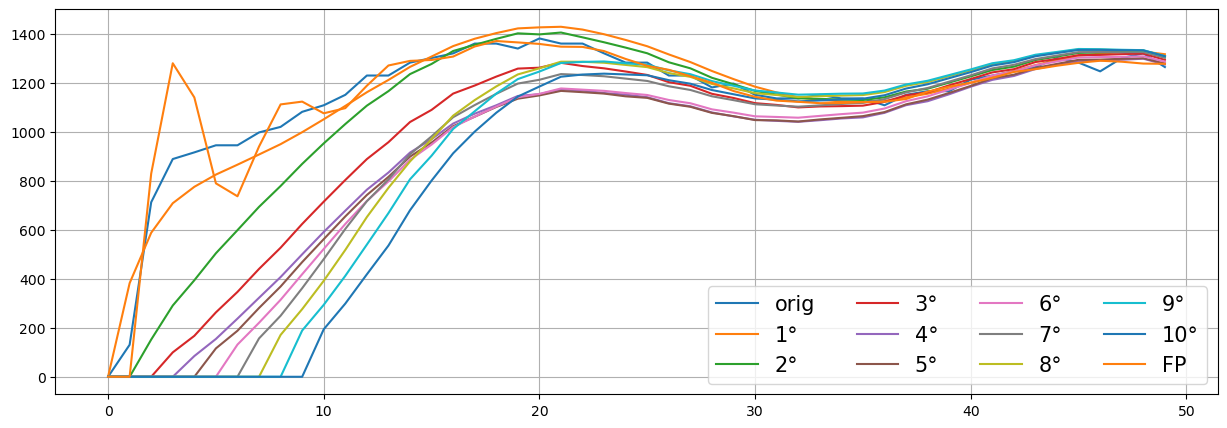

In [37]:
T1=0
T2=50
plt.figure(figsize=[15,5])
plt.grid(True)
plt.plot(    y_ar_111[T1:T2], label='orig')
plt.plot(y_hat_1o_111[T1:T2], label='1°')
plt.plot(y_hat_2o_111[T1:T2], label='2°')
plt.plot(y_hat_3o_111[T1:T2], label='3°')
plt.plot(y_hat_4o_111[T1:T2], label='4°')
plt.plot(y_hat_5o_111[T1:T2], label='5°')
plt.plot(y_hat_6o_111[T1:T2], label='6°')
plt.plot(y_hat_7o_111[T1:T2], label='7°')
plt.plot(y_hat_8o_111[T1:T2], label='8°')
plt.plot(y_hat_9o_111[T1:T2], label='9°')
plt.plot(y_hat_0o_111[T1:T2], label='10°')
plt.plot(y_hat_ed_111[T1:T2], label='FP')
plt.legend(fontsize=15, ncol=4, loc='lower right')

In [38]:
print('9V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_090,1)},    ARX 6ª ordem V = {np.round(V_6o_090,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_090,1)},    ARX 7ª ordem V = {np.round(V_7o_090,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_090,1)},    ARX 8ª ordem V = {np.round(V_8o_090,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_090,1)},    ARX 9ª ordem V = {np.round(V_9o_090,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_090,1)},    ARX 10ªordem V = {np.round(V_0o_090,1)}')
print(f'discretizado V = {np.round(V_ed_090,1)}')

print('9.7V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_097,1)},    ARX 6ª ordem V = {np.round(V_6o_097,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_097,1)},    ARX 7ª ordem V = {np.round(V_7o_097,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_097,1)},    ARX 8ª ordem V = {np.round(V_8o_097,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_097,1)},    ARX 9ª ordem V = {np.round(V_9o_097,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_097,1)},    ARX 10ªordem V = {np.round(V_0o_097,1)}')
print(f'discretizado V = {np.round(V_ed_097,1)}')

print('10.4V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_104,1)},    ARX 6ª ordem V = {np.round(V_6o_104,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_104,1)},    ARX 7ª ordem V = {np.round(V_7o_104,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_104,1)},    ARX 8ª ordem V = {np.round(V_8o_104,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_104,1)},    ARX 9ª ordem V = {np.round(V_9o_104,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_104,1)},    ARX 10ªordem V = {np.round(V_0o_104,1)}')
print(f'discretizado V = {np.round(V_ed_104,1)}')

print('11.1V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_111,1)},    ARX 6ª ordem V = {np.round(V_6o_111,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_111,1)},    ARX 7ª ordem V = {np.round(V_7o_111,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_111,1)},    ARX 8ª ordem V = {np.round(V_8o_111,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_111,1)},    ARX 9ª ordem V = {np.round(V_9o_111,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_111,1)},    ARX 10ªordem V = {np.round(V_0o_111,1)}')
print(f'discretizado V = {np.round(V_ed_111,1)}')

9V:
ARX 1ª ordem V = 2491.6,    ARX 6ª ordem V = 753.1
ARX 2ª ordem V = 1103.0,    ARX 7ª ordem V = 715.5
ARX 3ª ordem V = 861.8,    ARX 8ª ordem V = 720.2
ARX 4ª ordem V = 714.0,    ARX 9ª ordem V = 738.6
ARX 5ª ordem V = 779.0,    ARX 10ªordem V = 731.3
discretizado V = 362.3
9.7V:
ARX 1ª ordem V = 3141.6,    ARX 6ª ordem V = 939.8
ARX 2ª ordem V = 1394.6,    ARX 7ª ordem V = 922.6
ARX 3ª ordem V = 1111.8,    ARX 8ª ordem V = 900.9
ARX 4ª ordem V = 884.5,    ARX 9ª ordem V = 930.1
ARX 5ª ordem V = 943.2,    ARX 10ªordem V = 942.7
discretizado V = 391.6
10.4V:
ARX 1ª ordem V = 3867.6,    ARX 6ª ordem V = 1192.6
ARX 2ª ordem V = 1764.4,    ARX 7ª ordem V = 1129.3
ARX 3ª ordem V = 1255.3,    ARX 8ª ordem V = 1162.8
ARX 4ª ordem V = 1382.0,    ARX 9ª ordem V = 1150.1
ARX 5ª ordem V = 1341.5,    ARX 10ªordem V = 1191.5
discretizado V = 358.6
11.1V:
ARX 1ª ordem V = 4270.6,    ARX 6ª ordem V = 1320.3
ARX 2ª ordem V = 1889.6,    ARX 7ª ordem V = 1237.7
ARX 3ª ordem V = 1346.8,    ARX 8ª ord

In [39]:
V_1o_090_log = np.round(np.log10(V_1o_090),2)
V_2o_090_log = np.round(np.log10(V_2o_090),2)
V_3o_090_log = np.round(np.log10(V_3o_090),2)
V_4o_090_log = np.round(np.log10(V_4o_090),2)
V_5o_090_log = np.round(np.log10(V_5o_090),2)
V_6o_090_log = np.round(np.log10(V_6o_090),2)
V_7o_090_log = np.round(np.log10(V_7o_090),2)
V_8o_090_log = np.round(np.log10(V_8o_090),2)
V_9o_090_log = np.round(np.log10(V_9o_090),2)
V_0o_090_log = np.round(np.log10(V_0o_090),2)
V_ed_090_log = np.round(np.log10(V_ed_090),2)

V_1o_097_log = np.round(np.log10(V_1o_097),2)
V_2o_097_log = np.round(np.log10(V_2o_097),2)
V_3o_097_log = np.round(np.log10(V_3o_097),2)
V_4o_097_log = np.round(np.log10(V_4o_097),2)
V_5o_097_log = np.round(np.log10(V_5o_097),2)
V_6o_097_log = np.round(np.log10(V_6o_097),2)
V_7o_097_log = np.round(np.log10(V_7o_097),2)
V_8o_097_log = np.round(np.log10(V_8o_097),2)
V_9o_097_log = np.round(np.log10(V_9o_097),2)
V_0o_097_log = np.round(np.log10(V_0o_097),2)
V_ed_097_log = np.round(np.log10(V_ed_097),2)

V_1o_104_log = np.round(np.log10(V_1o_104),2)
V_2o_104_log = np.round(np.log10(V_2o_104),2)
V_3o_104_log = np.round(np.log10(V_3o_104),2)
V_4o_104_log = np.round(np.log10(V_4o_104),2)
V_5o_104_log = np.round(np.log10(V_5o_104),2)
V_6o_104_log = np.round(np.log10(V_6o_104),2)
V_7o_104_log = np.round(np.log10(V_7o_104),2)
V_8o_104_log = np.round(np.log10(V_8o_104),2)
V_9o_104_log = np.round(np.log10(V_9o_104),2)
V_0o_104_log = np.round(np.log10(V_0o_104),2)
V_ed_104_log = np.round(np.log10(V_ed_104),2)

V_1o_111_log = np.round(np.log10(V_1o_111),2)
V_2o_111_log = np.round(np.log10(V_2o_111),2)
V_3o_111_log = np.round(np.log10(V_3o_111),2)
V_4o_111_log = np.round(np.log10(V_4o_111),2)
V_5o_111_log = np.round(np.log10(V_5o_111),2)
V_6o_111_log = np.round(np.log10(V_6o_111),2)
V_7o_111_log = np.round(np.log10(V_7o_111),2)
V_8o_111_log = np.round(np.log10(V_8o_111),2)
V_9o_111_log = np.round(np.log10(V_9o_111),2)
V_0o_111_log = np.round(np.log10(V_0o_111),2)
V_ed_111_log = np.round(np.log10(V_ed_111),2)

In [40]:
print('9V:')
print(f'ARX 1ª ordem V = {V_1o_090_log},    ARX 6ª ordem V = {V_6o_090_log}')
print(f'ARX 2ª ordem V = {V_2o_090_log},    ARX 7ª ordem V = {V_7o_090_log}')
print(f'ARX 3ª ordem V = {V_3o_090_log},    ARX 8ª ordem V = {V_8o_090_log}')
print(f'ARX 4ª ordem V = {V_4o_090_log},    ARX 9ª ordem V = {V_9o_090_log}')
print(f'ARX 5ª ordem V = {V_5o_090_log},    ARX 10ªordem V = {V_0o_090_log}')
print(f'discretizado V = {V_ed_090_log}')

print('9.7V:')
print(f'ARX 1ª ordem V = {V_1o_097_log},    ARX 6ª ordem V = {V_6o_097_log}')
print(f'ARX 2ª ordem V = {V_2o_097_log},    ARX 7ª ordem V = {V_7o_097_log}')
print(f'ARX 3ª ordem V = {V_3o_097_log},    ARX 8ª ordem V = {V_8o_097_log}')
print(f'ARX 4ª ordem V = {V_4o_097_log},    ARX 9ª ordem V = {V_9o_097_log}')
print(f'ARX 5ª ordem V = {V_5o_097_log},    ARX 10ªordem V = {V_0o_097_log}')
print(f'discretizado V = {V_ed_097_log}')

print('10.4V:')
print(f'ARX 1ª ordem V = {V_1o_104_log},    ARX 6ª ordem V = {V_6o_104_log}')
print(f'ARX 2ª ordem V = {V_2o_104_log},    ARX 7ª ordem V = {V_7o_104_log}')
print(f'ARX 3ª ordem V = {V_3o_104_log},    ARX 8ª ordem V = {V_8o_104_log}')
print(f'ARX 4ª ordem V = {V_4o_104_log},    ARX 9ª ordem V = {V_9o_104_log}')
print(f'ARX 5ª ordem V = {V_5o_104_log},    ARX 10ªordem V = {V_0o_104_log}')
print(f'discretizado V = {V_ed_104_log}')

print('11.1V:')
print(f'ARX 1ª ordem V = {V_1o_111_log},    ARX 6ª ordem V = {V_6o_111_log}')
print(f'ARX 2ª ordem V = {V_2o_111_log},    ARX 7ª ordem V = {V_7o_111_log}')
print(f'ARX 3ª ordem V = {V_3o_111_log},    ARX 8ª ordem V = {V_8o_111_log}')
print(f'ARX 4ª ordem V = {V_4o_111_log},    ARX 9ª ordem V = {V_9o_111_log}')
print(f'ARX 5ª ordem V = {V_5o_111_log},    ARX 10ªordem V = {V_0o_111_log}')
print(f'discretizado V = {V_ed_111_log}')

9V:
ARX 1ª ordem V = 3.4,    ARX 6ª ordem V = 2.88
ARX 2ª ordem V = 3.04,    ARX 7ª ordem V = 2.85
ARX 3ª ordem V = 2.94,    ARX 8ª ordem V = 2.86
ARX 4ª ordem V = 2.85,    ARX 9ª ordem V = 2.87
ARX 5ª ordem V = 2.89,    ARX 10ªordem V = 2.86
discretizado V = 2.56
9.7V:
ARX 1ª ordem V = 3.5,    ARX 6ª ordem V = 2.97
ARX 2ª ordem V = 3.14,    ARX 7ª ordem V = 2.97
ARX 3ª ordem V = 3.05,    ARX 8ª ordem V = 2.95
ARX 4ª ordem V = 2.95,    ARX 9ª ordem V = 2.97
ARX 5ª ordem V = 2.97,    ARX 10ªordem V = 2.97
discretizado V = 2.59
10.4V:
ARX 1ª ordem V = 3.59,    ARX 6ª ordem V = 3.08
ARX 2ª ordem V = 3.25,    ARX 7ª ordem V = 3.05
ARX 3ª ordem V = 3.1,    ARX 8ª ordem V = 3.07
ARX 4ª ordem V = 3.14,    ARX 9ª ordem V = 3.06
ARX 5ª ordem V = 3.13,    ARX 10ªordem V = 3.08
discretizado V = 2.55
11.1V:
ARX 1ª ordem V = 3.63,    ARX 6ª ordem V = 3.12
ARX 2ª ordem V = 3.28,    ARX 7ª ordem V = 3.09
ARX 3ª ordem V = 3.13,    ARX 8ª ordem V = 3.09
ARX 4ª ordem V = 3.13,    ARX 9ª ordem V = 3.1
AR

In [41]:
best_ord_hall = find_best_ARX_order(u_ar_090,y_ar_090,5,0.10,True)
best_ord_hall = find_best_ARX_order(u_ar_097,y_ar_097,5,0.10,True)
best_ord_hall = find_best_ARX_order(u_ar_104,y_ar_104,5,0.10,True)
best_ord_hall = find_best_ARX_order(u_ar_111,y_ar_111,5,0.10,True)

ARX 1ª ordem V = 2546.8807556076576
ARX 2ª ordem V = 1830.5994785255532
ARX 3ª ordem V = 2336.1425463644778
2 é a melhor ordem
ARX 1ª ordem V = 3218.6078495064276
ARX 2ª ordem V = 2273.5086723781674
ARX 3ª ordem V = 3092.6758240503327
2 é a melhor ordem
ARX 1ª ordem V = 3954.095339171806
ARX 2ª ordem V = 2946.642542654543
ARX 3ª ordem V = 4229.1617135029965
2 é a melhor ordem
ARX 1ª ordem V = 4359.493558489651
ARX 2ª ordem V = 3138.7635549996858
ARX 3ª ordem V = 4614.559014632944
2 é a melhor ordem


In [42]:
# 9v
df = pd.DataFrame(theta_hat_1o_090)
df.to_csv('../data/theta_hat_1o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_090)
df.to_csv('../data/theta_hat_2o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_090)
df.to_csv('../data/theta_hat_3o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_090)
df.to_csv('../data/theta_hat_4o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_090)
df.to_csv('../data/theta_hat_ed_emax_090.csv',header=False,index=False)


# 9.7v
df = pd.DataFrame(theta_hat_1o_097)
df.to_csv('../data/theta_hat_1o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_097)
df.to_csv('../data/theta_hat_2o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_097)
df.to_csv('../data/theta_hat_3o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_097)
df.to_csv('../data/theta_hat_4o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_097)
df.to_csv('../data/theta_hat_ed_emax_097.csv',header=False,index=False)

# 10.4v
df = pd.DataFrame(theta_hat_1o_104)
df.to_csv('../data/theta_hat_1o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_104)
df.to_csv('../data/theta_hat_2o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_104)
df.to_csv('../data/theta_hat_3o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_104)
df.to_csv('../data/theta_hat_4o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_104)
df.to_csv('../data/theta_hat_ed_emax_104.csv',header=False,index=False)

# 11.1v
df = pd.DataFrame(theta_hat_1o_111)
df.to_csv('../data/theta_hat_1o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_111)
df.to_csv('../data/theta_hat_2o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_111)
df.to_csv('../data/theta_hat_3o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_111)
df.to_csv('../data/theta_hat_4o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_111)
df.to_csv('../data/theta_hat_ed_emax_111.csv',header=False,index=False)

In [43]:
print(f'09.0V: {np.concatenate((theta_hat_2o_090[:2].T,theta_hat_2o_090[2:].T/ 9  ),axis=1)}')
print(f'09.7V: {np.concatenate((theta_hat_2o_097[:2].T,theta_hat_2o_097[2:].T/ 9.7),axis=1)}')
print(f'10.4V: {np.concatenate((theta_hat_2o_104[:2].T,theta_hat_2o_104[2:].T/10.4),axis=1)}')
print(f'11.1V: {np.concatenate((theta_hat_2o_111[:2].T,theta_hat_2o_111[2:].T/11.1),axis=1)}')

09.0V: [[-7.73241366e-01 -3.25777981e-02  1.46200590e+02 -1.14069594e+02]]
09.7V: [[-7.73966279e-01 -3.11124734e-02  1.43579367e+02 -1.11515483e+02]]
10.4V: [[-8.26753806e-01  7.75369840e-03  1.37651329e+02 -1.07989626e+02]]
11.1V: [[-7.65790578e-01 -4.32023431e-02  1.41191173e+02 -1.10543058e+02]]


In [44]:
print(f'09.0V: {np.concatenate((theta_hat_ed_090[:4].T,theta_hat_ed_090[4:].T/ 9  ),axis=1)}')
print(f'09.7V: {np.concatenate((theta_hat_ed_097[:4].T,theta_hat_ed_097[4:].T/ 9.7),axis=1)}')
print(f'10.4V: {np.concatenate((theta_hat_ed_104[:4].T,theta_hat_ed_104[4:].T/10.4),axis=1)}')
print(f'11.1V: {np.concatenate((theta_hat_ed_111[:4].T,theta_hat_ed_111[4:].T/11.1),axis=1)}')

09.0V: [[-1.18420507e+00  5.73729822e-01  5.25553449e-04 -2.31692195e-04
  -3.18754858e+00  1.06039819e+02  1.37973176e+01]]
09.7V: [[-1.09960042e+00  5.42228070e-01  4.76082186e-04 -2.02264902e-04
  -3.31507999e+00  1.17661461e+02  8.50065897e+00]]
10.4V: [[-7.04310325e-01  4.33239028e-01  1.92197686e-05  9.73155998e-05
  -1.61907243e+00  1.60005034e+02 -2.75051818e+01]]
11.1V: [[-5.58866954e-01  3.14977686e-01  6.24539508e-05  1.11763140e-04
  -2.11877306e+00  1.68237823e+02 -1.94658540e+01]]


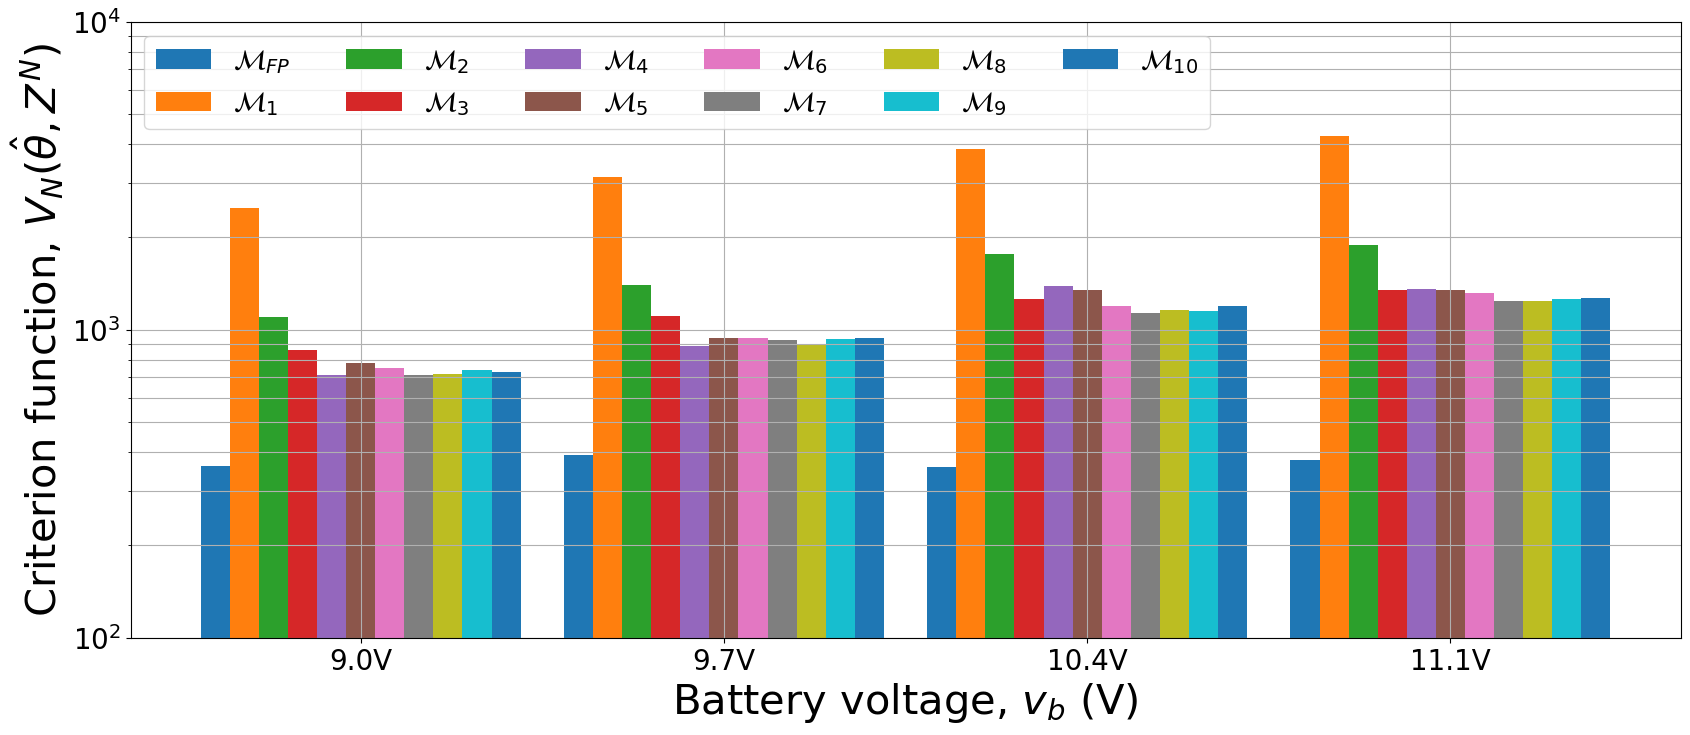

In [45]:
#matplotlib.pyplot.semilogy
voltages = ("9.0V", "9.7V", "10.4V", "11.1V")
cost_10 = {
    '$\mathcal{M}_{FP}$': (V_ed_090, V_ed_097, V_ed_104, V_ed_111),
    '$\mathcal{M}_{1}$' : (V_1o_090, V_1o_097, V_1o_104, V_1o_111),
    '$\mathcal{M}_{2}$' : (V_2o_090, V_2o_097, V_2o_104, V_2o_111),
    '$\mathcal{M}_{3}$' : (V_3o_090, V_3o_097, V_3o_104, V_3o_111),
    '$\mathcal{M}_{4}$' : (V_4o_090, V_4o_097, V_4o_104, V_4o_111),
    '$\mathcal{M}_{5}$' : (V_5o_090, V_5o_097, V_5o_104, V_5o_111),
    '$\mathcal{M}_{6}$' : (V_6o_090, V_6o_097, V_6o_104, V_6o_111),
    '$\mathcal{M}_{7}$' : (V_7o_090, V_7o_097, V_7o_104, V_7o_111),
    '$\mathcal{M}_{8}$' : (V_8o_090, V_8o_097, V_8o_104, V_8o_111),
    '$\mathcal{M}_{9}$' : (V_9o_090, V_9o_097, V_9o_104, V_9o_111),
    '$\mathcal{M}_{10}$': (V_0o_090, V_0o_097, V_0o_104, V_0o_111)
}

x = np.arange(len(voltages))  # the label locations
width = 0.08  # the width of the bars
multiplier = 0

fig = plt.figure(1,figsize=[20,8])
#fig, ax = plt.subplots(nrows=2, ncols=1, layout='constrained', figsize=[15,7], sharex=True)
plt.grid(True, which='both', markersize=0.01)

for attribute, measurement in cost_10.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=200)
    multiplier += 1

#plt.grid(True, 'both')
plt.xlabel('Battery voltage, $v_b$ (V)', fontsize=30)
plt.ylabel('Criterion function, $V_N(\hat{\\theta}, Z^N)$', fontsize=30)
plt.xticks(x + width*5, voltages)
plt.yscale("log")
plt.tick_params(labelsize=20)
plt.legend(loc='upper left', ncol=6, fontsize=20)
plt.ylim([10e1,10e3])


plt.show()